# Stock Skewness Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol = 'SCHW'

In [3]:
df = yf.download("SCHW", start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
returns = df['Adj Close'].pct_change()[1:].dropna()

In [5]:
def skewness(returns):
    stock_skewness = scs.skew(returns)
    return stock_skewness

Text(0, 0.5, 'Skewness')

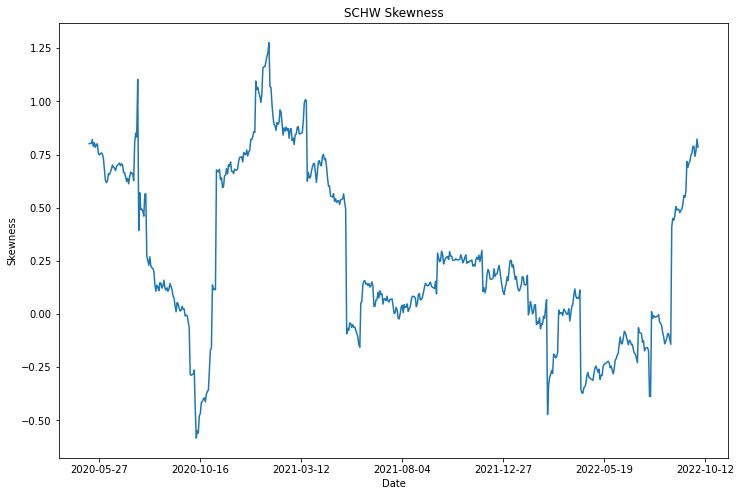

In [6]:
# Compute the running skewness
running = [skewness(returns[i-90:i]) for i in range(90, len(returns))]

# Plot running skewness up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([df.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Skewness')
plt.xlabel('Date')
plt.ylabel('Skewness')

In [7]:
sk = skewness(returns)
sk

0.4452747076977873

In [8]:
running = [skewness(returns[i-90:i]) for i in range(90, len(returns))]
running

[0.8009526373410635,
 0.8019861851601122,
 0.8015511317844511,
 0.8203398766981576,
 0.7875999255257011,
 0.8059743802046253,
 0.7837947723519982,
 0.7967005316393972,
 0.8000712660067675,
 0.7548106992671234,
 0.7482015667392369,
 0.7538934438522743,
 0.7576080093663515,
 0.7520706579831697,
 0.7314487375513233,
 0.6795021851818247,
 0.6295575906917149,
 0.6177528482124124,
 0.6252470778476102,
 0.6597451063963178,
 0.6553042875090798,
 0.6680235032433948,
 0.6827745972054396,
 0.7005674266659739,
 0.6888080565435106,
 0.6863127722137549,
 0.6747311141016924,
 0.6932701427207164,
 0.6997226544547077,
 0.7042813565748842,
 0.7100761796972339,
 0.6969518303868268,
 0.706380021241394,
 0.7010547193413834,
 0.6649526769364147,
 0.6651990182529061,
 0.6446948015173468,
 0.6234060704524761,
 0.6382473373111281,
 0.6123603823614088,
 0.6444026949459138,
 0.667246849940147,
 0.6603209130848465,
 0.6618616763730631,
 0.6267031655292624,
 0.8061915092139312,
 0.8509229511491334,
 0.832301061911